## Script 2: Detection, manipulation and removal of noisy electrodes

The detection of noisy data and, in particular, noisy electrodes is an important step when preparing EEG for analysis.
We can detect noisy electrodes by considering the following:
- the amplitude of activity in the time-dependent signal
- the region of the brain over which certain activity is concentrated. For example, we know that eye-blinks are characterised
by positive-going activity over frontal electrodes of the right and left hemispheres.
- by considering the frequency content of the electrode signals. High energy in the low frequency part of a spectrum indicates
activity that is slow, often of high amplitude; activity very often related to movements.

Below we will plot the power spectral density (PSD) of all electrodes for frequencies from 0.5Hz to 40Hz.
The PSD will be plotted in decibels (dB)

This script uses the .fif file saved in script1 after the high-pass filtering and re-referencing was carried out.
The **.fif** format is MNE-Python's own data format.

<div class = "alert alert-block alert-info">
<b>Note:</b> If you are working in Binder, you will need to upload the following file into the data folder:
- sub-001_eeg_sub-001_task-think1_eeg_short_raw.fif
It might take a few minutes to upload them so be patient.
</div>

In [1]:
%matplotlib widget
import mne
import os
import matplotlib.pyplot as plt
import numpy as np

# We begin by loading in .fif file that we saved at the end of script 1.
fnameIn = 'sub-001_eeg_sub-001_task-think1_eeg_short_raw.fif'
fpathIn = 'data'
fullnameIn = os.path.join(fpathIn, fnameIn)
rawIn = mne.io.read_raw_fif(fullnameIn, preload=True)

Opening raw data file data/sub-001_eeg_sub-001_task-think1_eeg_short_raw.fif...
    Range : 0 ... 51200 =      0.000 ...    50.000 secs
Ready.
Reading 0 ... 51200  =      0.000 ...    50.000 secs...


NOTE: plot_raw_psd() is a legacy function. New code should use Raw.compute_psd().plot().
Effective window size : 2.000 (s)


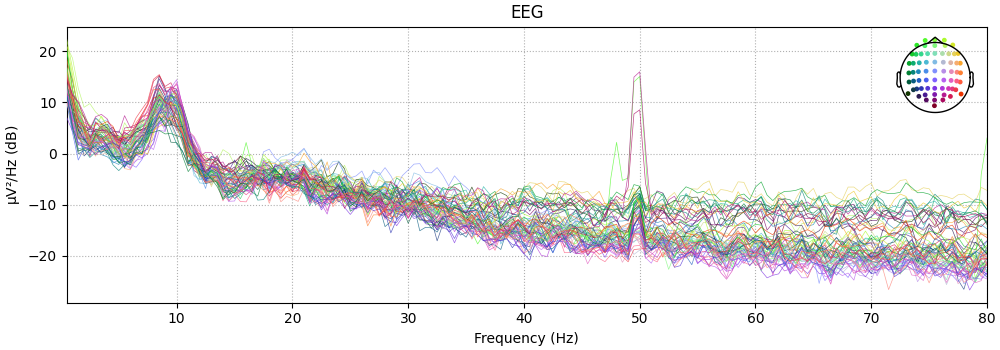

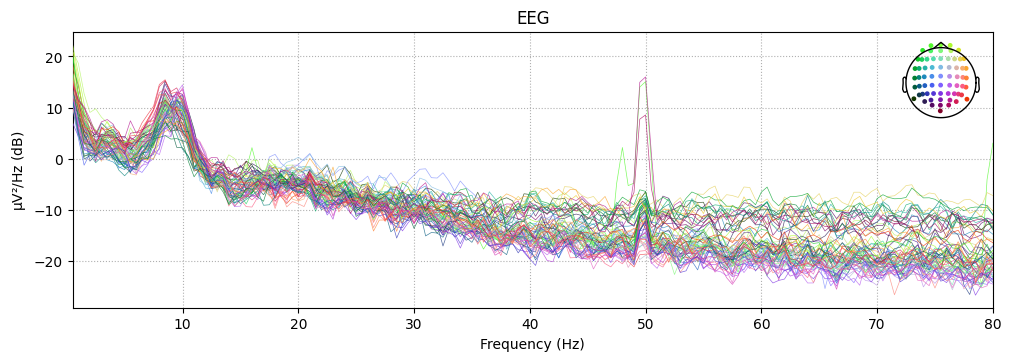

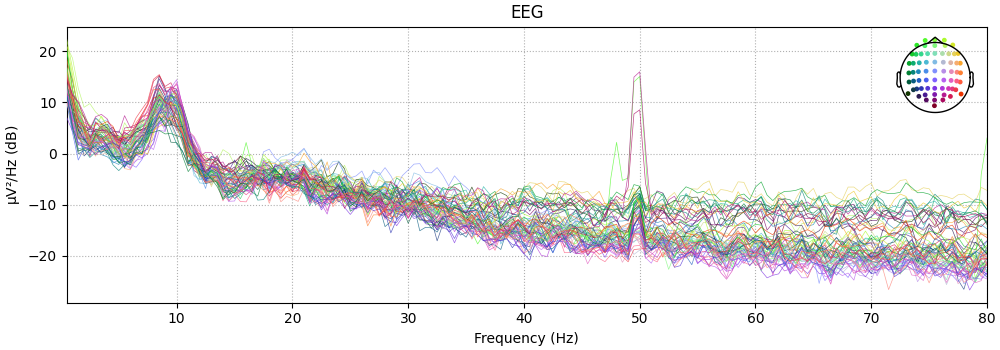

In [2]:
# Plot the power spectral density (PSD)

mne.viz.plot_raw_psd(rawIn, fmin=0.5, fmax=80, tmin=25, tmax=50, picks='eeg', dB=True)

### Computing the Power Spectral Density (PSD)

In the previous step, we applied the mne method, *plot_raw_psd()* to visualize the frequency content of our EEG dataset.
Here we will calculate the PSD (using a *multitaper* method) using the *comput_psd()* function. This function outputs the PSD values (in dB - a log scale) and the frequencies.
Then we plot the frequencies against the PSD values. 

Here we plot frequencies between 0.5Hz and 80Hz. 
We are plotting the spectrum for the scalp channel (*picks = 'eeg').

<div class="alert alert-block alert-success">
<b>Question:</b> At what frequencies do we observe peaks? 
Do you know what these peak frequencies might correspond to? </div>


    Using multitaper spectrum estimation with 7 DPSS windows
The PSD will be plotted for these [ 0.51998984  0.53998945  0.55998906 ... 79.95843831 79.97843792
 79.99843753]


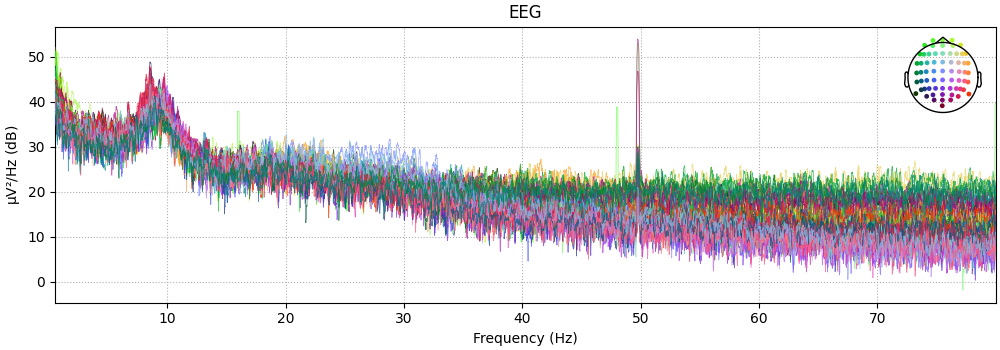

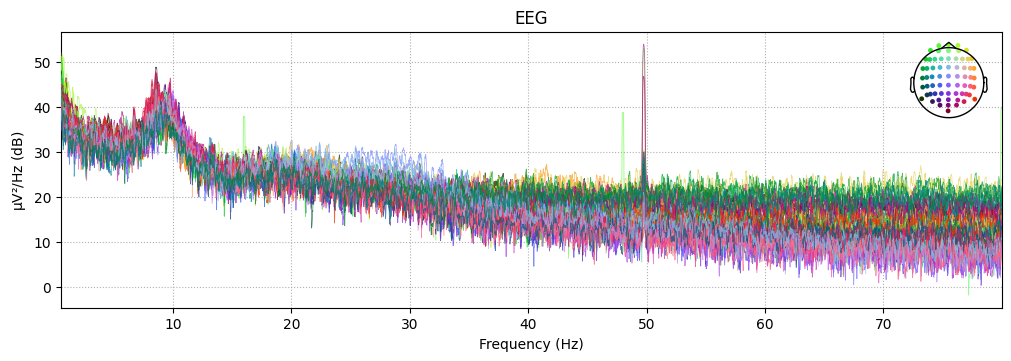

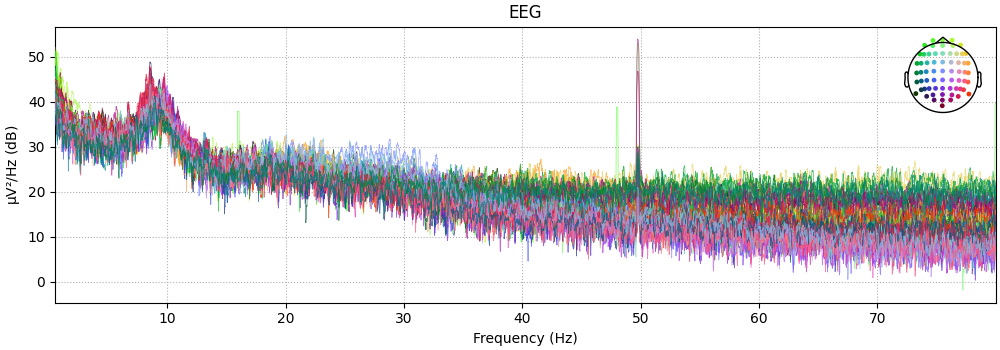

In [3]:

rawSpectre = rawIn.compute_psd(method='multitaper', fmin=0.5, fmax=80, tmin=None, tmax=None, picks='eeg')
PSD, freqs = rawSpectre.get_data(exclude=(), return_freqs=True)
print(f'The PSD will be plotted for these {freqs}')

# We can then plot the spectra by applying .plot() method
rawSpectre.plot()

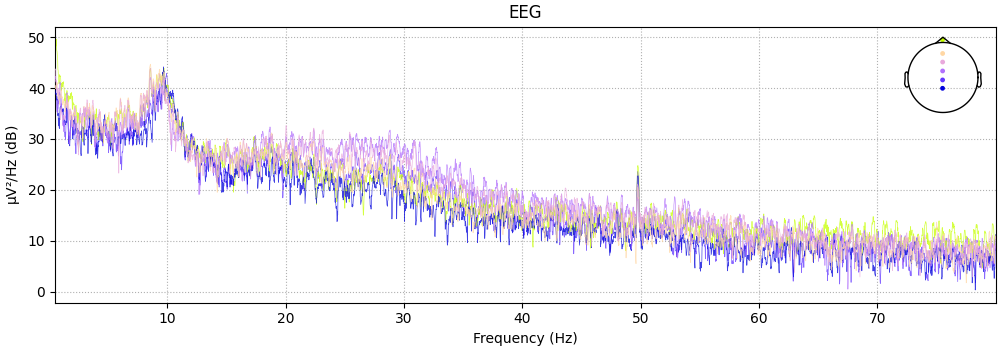

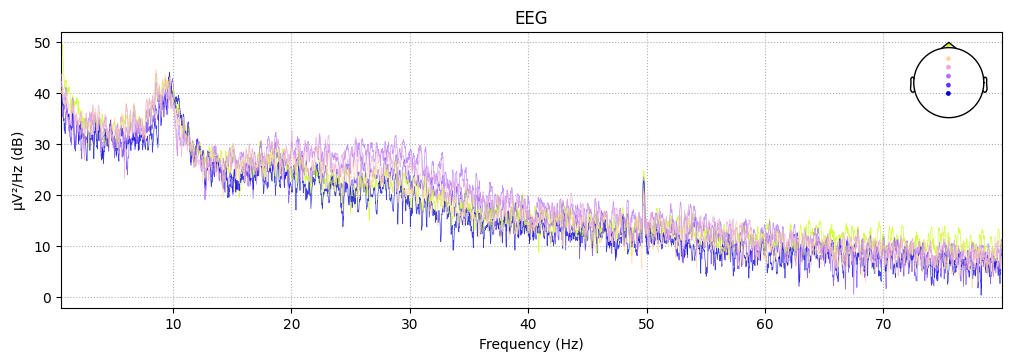

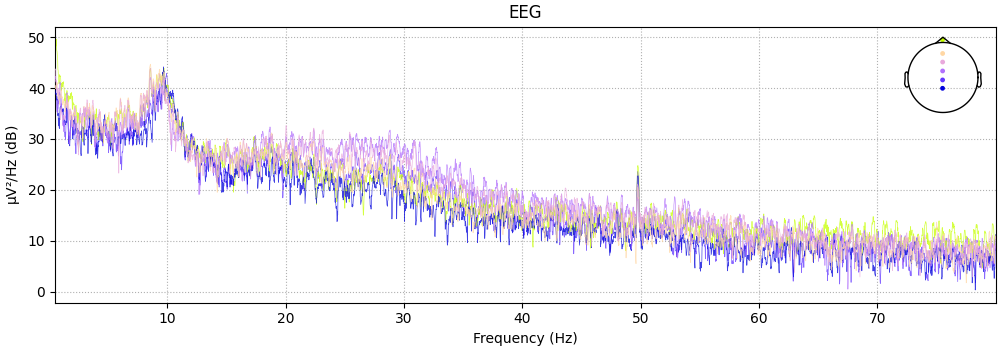

In [4]:
# We could also plot the spectrum of a subset of electrodes.

chanSelect = ['Fpz', 'Fz', 'FCz', 'Cz', 'CPz', 'Pz']
rawSpectre.plot(picks=chanSelect)

## Visualizing the spatial distribution of frequency band activity

We can also plot the topography of the activity in the different frequency bands.
We can plot the topographies because we added the correct montage to the dataset in script1. 

For EEG analyses we consider the following frequency bands:
- theta (4-7Hz)
- alpha (8-12Hz)
- beta (12-30Hz)
- gamma (>30Hz)

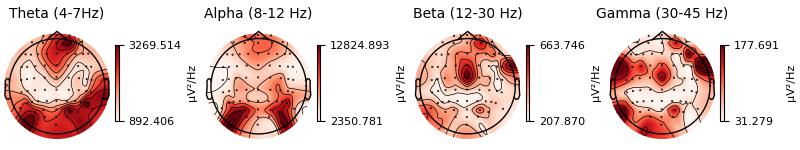

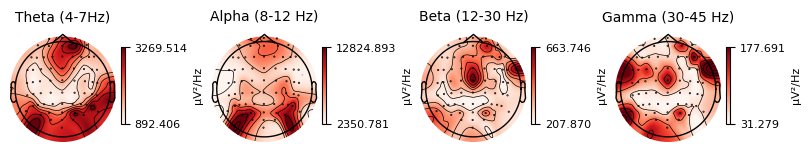

In [5]:
# We begin by defining the frequency bands.

fbands = {'Theta (4-7Hz)': (4,7), 'Alpha (8-12 Hz)': (8, 12), 'Beta (12-30 Hz)': (12, 30),
         'Gamma (30-45 Hz)': (30, 45)}
rawSpectre.plot_topomap(bands=fbands, ch_type='eeg')

## Detecting and marking noisy electrodes

On the basis of the spectrum plotted, are we able to determine any noisy electrodes? 

In MNE-Python, when we want to mark an electrode as **noisy** or **bad** we can add it to the **bads** attribute
of the *.info* object.
The following gives an example of this; here we presume that Fpz and Oz are noisy electrodes.

In [6]:
badChannels = ['PO4']
rawIn.info['bads'] = badChannels